In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df_jk_vladivostok = pd.read_excel('data/ЖК_Владивостока.xlsx') #header = 1
df_sales_matrix = pd.read_excel('data/Матрица продаж.xlsx')

In [5]:
print(df_jk_vladivostok.head())
print(df_sales_matrix.head())

              Unnamed: 0       Unnamed: 1                 Unnamed: 2  \
0                     ЖК  Novatoria 37491  Элементс (ELEMENTS) 33985   
1     Количество квартир              364                         88   
2  Общая площадь квартир            24247                       6024   
3      Дата получения РС       21.09.2020                 23.08.2019   
4    Дата публикации ИНС       07.10.2020                 15.11.2019   

            Unnamed: 3             Unnamed: 4             Unnamed: 5  \
0  АкадемГородок 37348  Зелёный бульвар 31111  Зелёный бульвар 28631   
1                  450                    325                    209   
2                14572                  10170                  12043   
3           09.10.2017             30.08.2021             30.08.2021   
4           12.10.2020             06.09.2021             06.09.2021   

      Unnamed: 6        Unnamed: 7              Unnamed: 8  \
0  Солярис 40263  Невельской 11897  Четыре горизонта 37838   
1         

Удаление строк в таблице ЖК_Владивосток и транспонирование её для будущего слияния с матрицей продаж

Индексы таблицы :
Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       ...
       'Unnamed: 109', 'Unnamed: 110', 'Unnamed: 111', 'Unnamed: 112',
       'Unnamed: 113', 'Unnamed: 114', 'Unnamed: 115', 'Unnamed: 116',
       'Unnamed: 117', 'Unnamed: 118'],
      dtype='object', length=118)
ЖК Владивостока после удаления лишних строк:
Unnamed: 0                         ЖК Количество квартир  \
Unnamed: 1            Novatoria 37491                364   
Unnamed: 2  Элементс (ELEMENTS) 33985                 88   
Unnamed: 3        АкадемГородок 37348                450   
Unnamed: 4      Зелёный бульвар 31111                325   
Unnamed: 5      Зелёный бульвар 28631                209   

Unnamed: 0 Общая площадь квартир Дата получения РС Дата публикации ИНС  \
Unnamed: 1                 24247        21.09.2020          07.10.2020   
Unnamed: 2                  6024        23.08.

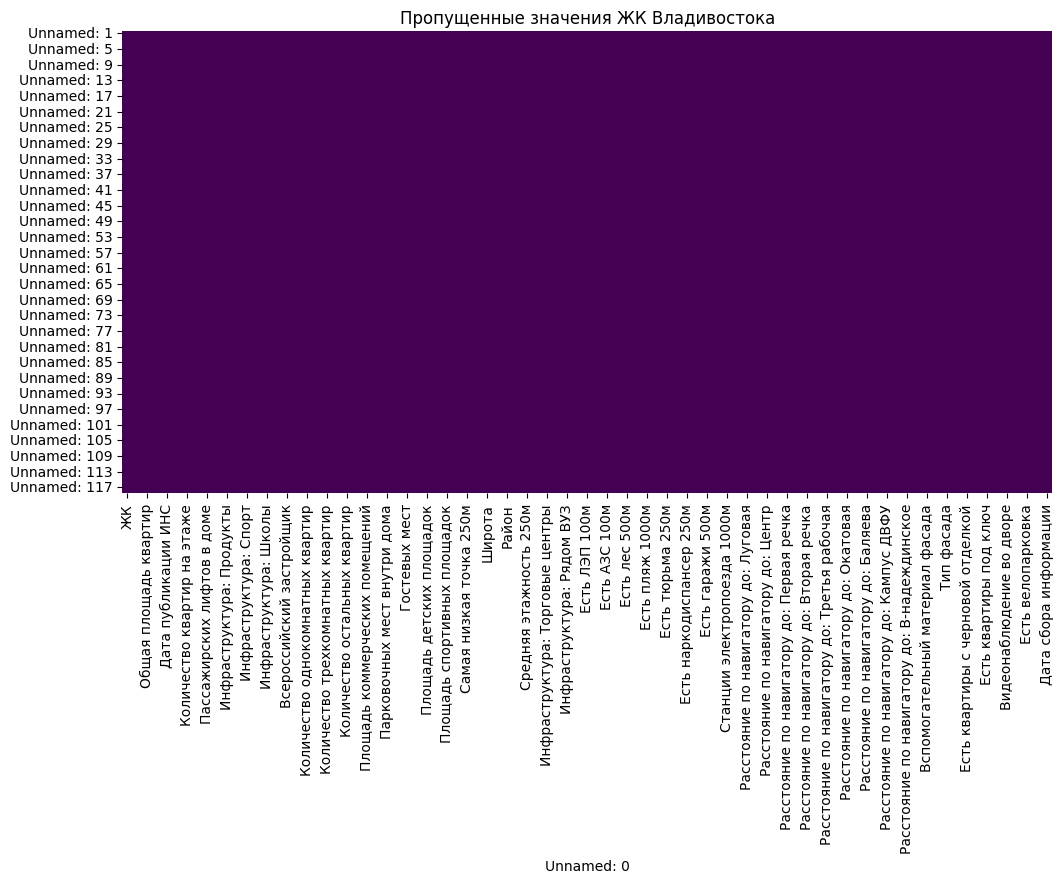

Unnamed: 0                         ЖК Количество квартир  \
Unnamed: 1            Novatoria 37491                364   
Unnamed: 2  Элементс (ELEMENTS) 33985                 88   
Unnamed: 3        АкадемГородок 37348                450   
Unnamed: 4      Зелёный бульвар 31111                325   
Unnamed: 5      Зелёный бульвар 28631                209   

Unnamed: 0 Общая площадь квартир Дата получения РС Дата публикации ИНС  \
Unnamed: 1                 24247        21.09.2020          07.10.2020   
Unnamed: 2                  6024        23.08.2019          15.11.2019   
Unnamed: 3                 14572        09.10.2017          12.10.2020   
Unnamed: 4                 10170        30.08.2021          06.09.2021   
Unnamed: 5                 12043        30.08.2021          06.09.2021   

Unnamed: 0 Подъездов в доме Количество квартир на этаже Количество этажей  \
Unnamed: 1                3                           7                23   
Unnamed: 2                1                           5                23   
Unnamed: 3                1                          18                29   
Unnamed: 4                1                          12                26   
Unnamed: 5                1                           8                25   

Unnamed: 0 Пассажирских лифтов в доме Грузовых лифтов в доме  ...  \
Unnamed: 1                          6                      3  ...   
Unnamed: 2                          2                      0  ...   
Unnamed: 3                          3                      3  ...   
Unnamed: 4                          1                      2  ...   
Unnamed: 5                          2                      2  ...   

Unnamed: 0 Есть квартиры без отделки Есть квартиры с черновой отделкой  \
Unnamed: 1                        Да                                Да   
Unnamed: 2                        Да                                Да   
Unnamed: 3                        Да                               Нет   
Unnamed: 4                        Да                               Нет   
Unnamed: 5                        Да                               Нет   

Unnamed: 0 Есть квартиры с чистовой отделкой Есть квартиры под ключ  \
Unnamed: 1                               Нет                     Да   
Unnamed: 2                        Неизвестно                    Нет   
Unnamed: 3                               Нет                    Нет   
Unnamed: 4                               Нет                    Нет   
Unnamed: 5                               Нет                    Нет   

Unnamed: 0 Закрытая территория Видеонаблюдение во дворе  \
Unnamed: 1          Неизвестно                       Да   
Unnamed: 2                  Да                       Да   
Unnamed: 3                 Нет                      Нет   
Unnamed: 4                 Нет               Неизвестно   
Unnamed: 5          Неизвестно               Неизвестно   

Unnamed: 0 Есть площадки для собак Есть велопарковка  \
Unnamed: 1              Неизвестно        Неизвестно   
Unnamed: 2                     Нет        Неизвестно   
Unnamed: 3                      Да        Неизвестно   
Unnamed: 4              Неизвестно        Неизвестно   
Unnamed: 5              Неизвестно        Неизвестно   

Unnamed: 0 Внутренний двор без машин Дата сбора информации  
Unnamed: 1                        Да            22.12.2021  
Unnamed: 2                        Да            18.01.2022  
Unnamed: 3                       Нет            22.12.2021  
Unnamed: 4                       Нет            22.12.2021  
Unnamed: 5                       Нет            22.12.2021  

[5 rows x 93 columns]

In [6]:
df_jk_vladivostok = df_jk_vladivostok.set_index(df_jk_vladivostok.columns[0]).transpose()

print("Индексы таблицы :")
print(df_jk_vladivostok.index)

columns_to_drop = [
    'Общая сумма полученных денег с проданных квартир, руб',
    'Количество проданных машиномест',
    'Количество проданных квартир',
    'Общая площадь проданных квартир',
    'Процент распроданности',
    'Кумулятивная средняя стоимость кв.метра',
    'Количество проданных нежилых помещений',
    'Вид из окна на море'
]

columns_to_drop = [col for col in columns_to_drop if col in df_jk_vladivostok.columns]
df_jk_vladivostok.drop(columns=columns_to_drop, inplace=True)

print("ЖК Владивостока после удаления лишних строк:")
print(df_jk_vladivostok.head(5))

plt.figure(figsize=(12, 6))
sns.heatmap(df_jk_vladivostok.isnull(), cbar=False, cmap='viridis')
plt.title('Пропущенные значения ЖК Владивостока')
plt.show()
df_jk_vladivostok.head(5)

In [7]:
df_jk_vladivostok.describe()

Unnamed: 0               ЖК  Количество квартир Общая площадь квартир  \
count                   118                 118                   118   
unique                  118                  80                   101   
top         Novatoria 37491                 312                12 549   
freq                      1                   7                     6   

Unnamed: 0 Дата получения РС  Дата публикации ИНС  Подъездов в доме  \
count                    118                  118               118   
unique                    65                   66                 8   
top               26.06.2018  2021-01-27 00:00:00                 1   
freq                       6                    6                63   

Unnamed: 0  Количество квартир на этаже  Количество этажей  \
count                               118                118   
unique                               19                 22   
top                                  10                 26   
freq                                 17                 19   

Unnamed: 0  Пассажирских лифтов в доме  Грузовых лифтов в доме  ...  \
count                              118                     118  ...   
unique                              10                       8  ...   
top                                  2                       2  ...   
freq                                40                      44  ...   

Unnamed: 0  Есть квартиры без отделки  Есть квартиры с черновой отделкой  \
count                             118                                118   
unique                              3                                  3   
top                                Да                                 Да   
freq                               92                                 69   

Unnamed: 0  Есть квартиры с чистовой отделкой  Есть квартиры под ключ  \
count                                     118                     118   
unique                                      3                       3   
top                                       Нет                     Нет   
freq                                       60                      86   

Unnamed: 0  Закрытая территория  Видеонаблюдение во дворе  \
count                       118                       118   
unique                        3                         4   
top                         Нет                Неизвестно   
freq                         77                        54   

Unnamed: 0 Есть площадки для собак  Есть велопарковка  \
count                          118                118   
unique                           3                  4   
top                            Нет         Неизвестно   
freq                            56                 42   

Unnamed: 0  Внутренний двор без машин  Дата сбора информации  
count                             118                    118  
unique                              3                     16  
top                               Нет             27.12.2021  
freq                               59                     20  

[4 rows x 93 columns]

После небольшого преобразования данных тут нужна чистка данных. Все булевые признаки нужно привести к виду 1 - 0 или 1 - -1. Все остальные данные также привести к другим типам
Т.к. в матрице ЖК для мерджа необходимо иметь отдельно название проекта и корпус - разбиваем строку ЖК на две строки и удаляем её

In [8]:
df_jk_vladivostok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, Unnamed: 1 to Unnamed: 118
Data columns (total 93 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   ЖК                                           118 non-null    object
 1   Количество квартир                           118 non-null    object
 2   Общая площадь квартир                        118 non-null    object
 3   Дата получения РС                            118 non-null    object
 4   Дата публикации ИНС                          118 non-null    object
 5   Подъездов в доме                             118 non-null    object
 6   Количество квартир на этаже                  118 non-null    object
 7   Количество этажей                            118 non-null    object
 8   Пассажирских лифтов в доме                   118 non-null    object
 9   Грузовых лифтов в доме                       118 non-null    object
 10  И

In [9]:
df_jk_vladivostok[['Проект', 'Корпус']] = df_jk_vladivostok['ЖК'].str.extract(r'(.+)\s+(\d+)', expand=True)
df_jk_vladivostok = df_jk_vladivostok.drop(columns=['ЖК', 'Дата получения РС', 'Дата публикации ИНС', 'Дата сбора информации'])

row_columns = [
    'Район',
    'Основной материал фасада',
    'Вспомогательный материал фасада',
    'Тип дома',
    'Тип фасада',
    'Проект'
]

to_int_columns = [
    'Количество квартир',
    'Подъездов в доме',
    'Количество квартир на этаже',
    'Количество этажей',
    'Пассажирских лифтов в доме',
    'Грузовых лифтов в доме',
    'Инфраструктура: Продукты',
    'Инфраструктура: Медицина',
    'Инфраструктура: Спорт',
    'Инфраструктура: Новостройки',
    'Инфраструктура: Школы',
    'Инфраструктура: Детские сады',
    'Количество студий',
    'Количество однокомнатных квартир',
    'Количество двухкомнатных квартир',
    'Количество трехкомнатных квартир',
    'Количество четырехкомнатных квартир',
    'Количество остальных квартир',
    'Всего парковочных мест',
    'Парковочных мест внутри дома',
    'Парковочных мест у дома',
    'Гостевых мест',
    'Количество домов 250м',
    'Корпус'
]

boolean_columns = [
    'Всероссийский застройщик',
    'Инфраструктура: Рядом ВУЗ',
    'Есть железная дорога 250м',
    'Есть ЛЭП 100м',
    'Есть магистральные дороги 100м',
    'Есть АЗС 100м',
    'Есть скверы 500м',
    'Есть лес 500м',
    'Есть водоем 500м',
    'Есть пляж 1000м',
    'Есть кладбище 250м',
    'Есть тюрьма 250м',
    'Есть ПНД 250м',
    'Есть наркодиспансер 250м',
    'Есть промзона 250м',
    'Есть гаражи 500м',
    'Станции электропоезда 1000м',
    'Уехать без пересадок: Луговая',
    'Уехать без пересадок: Центр',
    'Уехать без пересадок: Первая речка',
    'Уехать без пересадок: Вторая речка',
    'Уехать без пересадок: Третья рабочая',
    'Уехать без пересадок: Окатовая',
    'Уехать без пересадок: Баляева',
    'Уехать без пересадок: Кампус ДВФУ',
    'Есть квартиры без отделки',
    'Есть квартиры с черновой отделкой',
    'Есть квартиры с чистовой отделкой',
    'Есть квартиры под ключ',
    'Закрытая территория',
    'Видеонаблюдение во дворе',
    'Есть площадки для собак',
    'Есть велопарковка',
    'Внутренний двор без машин'
]

float_columns = [
    'Расстояние по навигатору до: Луговая',
    'Расстояние по навигатору до: Центр',
    'Расстояние по навигатору до: Первая речка',
    'Расстояние по навигатору до: Вторая речка',
    'Расстояние по навигатору до: Третья рабочая',
    'Расстояние по навигатору до: Окатовая',
    'Расстояние по навигатору до: Баляева',
    'Расстояние по навигатору до: Кампус ДВФУ',
    'Расстояние по навигатору до: Артем',
    'Расстояние по навигатору до: В-надеждинское',
    'Общая площадь квартир',
    'Высота потолков',
    'Площадь коммерческих помещений',
    'Общая площадь земельного участка',
    'Площадь детских площадок',
    'Площадь особых площадок',
    'Площадь спортивных площадок',
    'Высота над уровнем моря',
    'Самая низкая точка 250м',
    'Самая высокая точка 250м',
    'Широта',
    'Долгота',
    'Средняя этажность 250м',
    'Разнообразие общественного транспорта 1000м',
    'Расстояние до ближайшего строения'
]
for col in to_int_columns:
    df_jk_vladivostok[col] = pd.to_numeric(df_jk_vladivostok[col], errors='coerce').astype('Int64')

for col in row_columns:
    df_jk_vladivostok[col] = df_jk_vladivostok[col].astype(str)

for col in float_columns:
    df_jk_vladivostok[col] = pd.to_numeric(df_jk_vladivostok[col], errors='coerce').astype('float')

df_jk_vladivostok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, Unnamed: 1 to Unnamed: 118
Data columns (total 91 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Количество квартир                           118 non-null    Int64  
 1   Общая площадь квартир                        88 non-null     float64
 2   Подъездов в доме                             118 non-null    Int64  
 3   Количество квартир на этаже                  118 non-null    Int64  
 4   Количество этажей                            118 non-null    Int64  
 5   Пассажирских лифтов в доме                   118 non-null    Int64  
 6   Грузовых лифтов в доме                       118 non-null    Int64  
 7   Инфраструктура: Продукты                     118 non-null    Int64  
 8   Инфраструктура: Медицина                     118 non-null    Int64  
 9   Инфраструктура: Спорт                        118 non-null    In

In [10]:
df_jk_vladivostok.head(5)

Unnamed: 0  Количество квартир  Общая площадь квартир  Подъездов в доме  \
Unnamed: 1                 364                24247.0                 3   
Unnamed: 2                  88                 6024.0                 1   
Unnamed: 3                 450                14572.0                 1   
Unnamed: 4                 325                10170.0                 1   
Unnamed: 5                 209                12043.0                 1   

Unnamed: 0  Количество квартир на этаже  Количество этажей  \
Unnamed: 1                            7                 23   
Unnamed: 2                            5                 23   
Unnamed: 3                           18                 29   
Unnamed: 4                           12                 26   
Unnamed: 5                            8                 25   

Unnamed: 0  Пассажирских лифтов в доме  Грузовых лифтов в доме  \
Unnamed: 1                           6                       3   
Unnamed: 2                           2                       0   
Unnamed: 3                           3                       3   
Unnamed: 4                           1                       2   
Unnamed: 5                           2                       2   

Unnamed: 0  Инфраструктура: Продукты  Инфраструктура: Медицина  \
Unnamed: 1                        50                        11   
Unnamed: 2                        50                         9   
Unnamed: 3                        20                         1   
Unnamed: 4                        29                         0   
Unnamed: 5                        29                         0   

Unnamed: 0  Инфраструктура: Спорт  ...  Есть квартиры с черновой отделкой  \
Unnamed: 1                     50  ...                                 Да   
Unnamed: 2                     24  ...                                 Да   
Unnamed: 3                      9  ...                                Нет   
Unnamed: 4                      2  ...                                Нет   
Unnamed: 5                      2  ...                                Нет   

Unnamed: 0  Есть квартиры с чистовой отделкой  Есть квартиры под ключ  \
Unnamed: 1                                Нет                      Да   
Unnamed: 2                         Неизвестно                     Нет   
Unnamed: 3                                Нет                     Нет   
Unnamed: 4                                Нет                     Нет   
Unnamed: 5                                Нет                     Нет   

Unnamed: 0 Закрытая территория  Видеонаблюдение во дворе  \
Unnamed: 1          Неизвестно                        Да   
Unnamed: 2                  Да                        Да   
Unnamed: 3                 Нет                       Нет   
Unnamed: 4                 Нет                Неизвестно   
Unnamed: 5          Неизвестно                Неизвестно   

Unnamed: 0  Есть площадки для собак  Есть велопарковка  \
Unnamed: 1               Неизвестно         Неизвестно   
Unnamed: 2                      Нет         Неизвестно   
Unnamed: 3                       Да         Неизвестно   
Unnamed: 4               Неизвестно         Неизвестно   
Unnamed: 5               Неизвестно         Неизвестно   

Unnamed: 0  Внутренний двор без машин               Проект  Корпус  
Unnamed: 1                         Да            Novatoria   37491  
Unnamed: 2                         Да  Элементс (ELEMENTS)   33985  
Unnamed: 3                        Нет        АкадемГородок   37348  
Unnamed: 4                        Нет      Зелёный бульвар   31111  
Unnamed: 5                        Нет      Зелёный бульвар   28631  

[5 rows x 91 columns]

Исследуем матрицу продаж на прореженность. Видно, что ответов для призакового описания не так много.

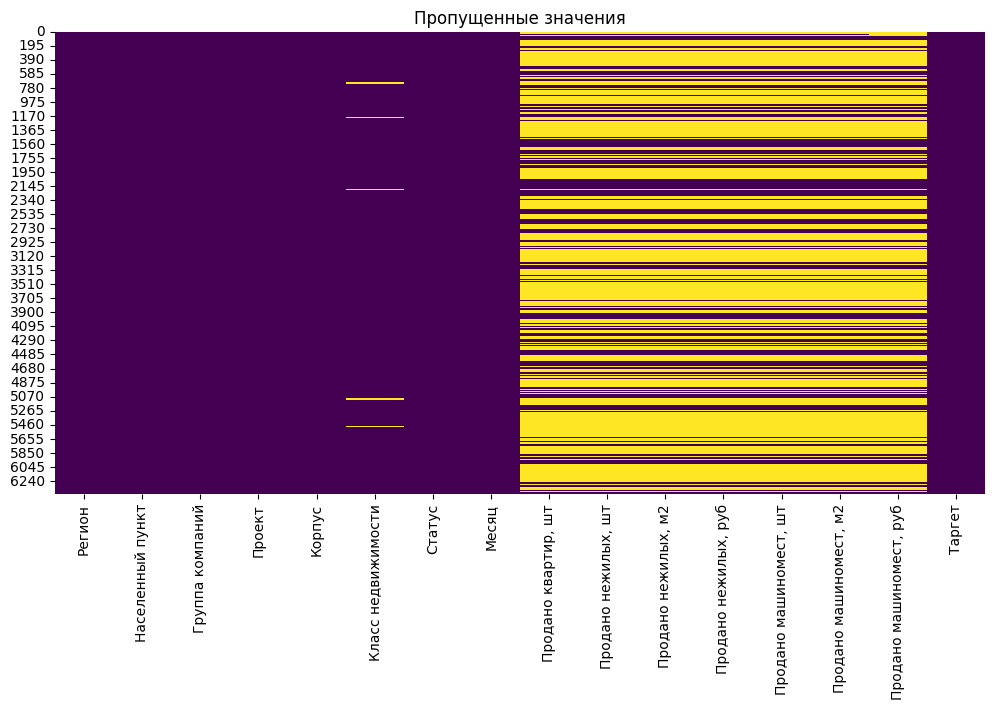

In [11]:
df_sales_matrix = df_sales_matrix.drop(columns=['Продано квартир, руб', 'Продано квартир, м2', 'ID проекта', 'index()'])

df_sales_matrix = df_sales_matrix.drop(columns=['Unnamed: 18'])
plt.figure(figsize=(12, 6))
sns.heatmap(df_sales_matrix.isnull(), cbar=False, cmap='viridis')
plt.title('Пропущенные значения')
plt.show()

In [12]:
df_sales_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417 entries, 0 to 6416
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Регион                   6417 non-null   object 
 1   Населенный пункт         6417 non-null   object 
 2   Группа компаний          6417 non-null   object 
 3   Проект                   6417 non-null   object 
 4   Корпус                   6417 non-null   int64  
 5   Класс недвижимости       6317 non-null   object 
 6   Статус                   6417 non-null   object 
 7   Месяц                    6417 non-null   object 
 8   Продано квартир, шт      2508 non-null   float64
 9   Продано нежилых, шт      2508 non-null   float64
 10  Продано нежилых, м2      2509 non-null   object 
 11  Продано нежилых, руб     2508 non-null   float64
 12  Продано машиномест, шт   2508 non-null   float64
 13  Продано машиномест, м2   2508 non-null   float64
 14  Продано машиномест, руб 

In [13]:
df_sales_matrix[['Месяц продажи', 'Год']] = df_sales_matrix['Месяц'].str.extract(r'(.+)\s+(\d+)', expand=True)
df_sales_matrix = df_sales_matrix.drop(columns=['Месяц'])

row_columns = [
'Регион',
'Населенный пункт',
'Группа компаний',
'Проект',
'Класс недвижимости',
'Месяц продажи'
]

to_int_columns = [
'Корпус',
'Продано квартир, шт',
'Продано нежилых, шт',
'Год'
]

boolean_columns = [
'Статус'
]

float_columns = [
'Продано нежилых, шт',
'Продано нежилых, м2',
'Продано нежилых, руб',
'Продано машиномест, шт',
'Продано машиномест, м2',	
'Продано машиномест, руб',
'Таргет'
]

for col in to_int_columns:
    df_sales_matrix[col] = pd.to_numeric(df_sales_matrix[col], errors='coerce').astype('Int64')

for col in row_columns:
    df_sales_matrix[col] = df_sales_matrix[col].astype(str)

for col in float_columns:
    df_sales_matrix[col] = pd.to_numeric(df_sales_matrix[col], errors='coerce').astype('float')

df_sales_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417 entries, 0 to 6416
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Регион                   6417 non-null   object 
 1   Населенный пункт         6417 non-null   object 
 2   Группа компаний          6417 non-null   object 
 3   Проект                   6417 non-null   object 
 4   Корпус                   6417 non-null   Int64  
 5   Класс недвижимости       6417 non-null   object 
 6   Статус                   6417 non-null   object 
 7   Продано квартир, шт      2508 non-null   Int64  
 8   Продано нежилых, шт      2508 non-null   float64
 9   Продано нежилых, м2      2508 non-null   float64
 10  Продано нежилых, руб     2508 non-null   float64
 11  Продано машиномест, шт   2508 non-null   float64
 12  Продано машиномест, м2   2508 non-null   float64
 13  Продано машиномест, руб  2506 non-null   float64
 14  Таргет                  

Кусок кода, интерполирующий значения для столбца таргет в таблице матрица продаж для отдельного ЖК

In [14]:
def has_at_least_two_nonzero(series):
    return (series != 0).sum() >= 2

df_sales_matrix = df_sales_matrix.groupby(['Проект', 'Корпус']).filter(lambda x: has_at_least_two_nonzero(x['Таргет']))

print("Матрица продаж после интерполяции:")
print(df_sales_matrix['Таргет'].head(73))

Матрица продаж после интерполяции:
40     75333.33333
41     79341.08183
42     81417.95484
43     80162.89290
44     80170.68513
          ...     
108    95000.00000
109        0.00000
110    96003.53357
111    99000.00000
112    95000.00000
Name: Таргет, Length: 73, dtype: float64


In [15]:
df_sales_matrix.head(5)

Регион Населенный пункт Группа компаний Проект  Корпус  \
40  Приморский край            Артем          Регион  Тепло   37875   
41  Приморский край            Артем          Регион  Тепло   37875   
42  Приморский край            Артем          Регион  Тепло   37875   
43  Приморский край            Артем          Регион  Тепло   37875   
44  Приморский край            Артем          Регион  Тепло   37875   

   Класс недвижимости Статус  Продано квартир, шт  Продано нежилых, шт  \
40            Комфорт   Сдан                    3                  0.0   
41            Комфорт   Сдан                   10                  1.0   
42            Комфорт   Сдан                    9                  3.0   
43            Комфорт   Сдан                    6                  1.0   
44            Комфорт   Сдан                    5                  0.0   

    Продано нежилых, м2  Продано нежилых, руб  Продано машиномест, шт  \
40                 0.00                   0.0                     0.0   
41                 5.42              162600.0                     0.0   
42                30.75              922500.0                     0.0   
43                 5.22              156600.0                     0.0   
44                 0.00                   0.0                     0.0   

    Продано машиномест, м2  Продано машиномест, руб       Таргет  \
40                     0.0                      NaN  75333.33333   
41                     0.0                      NaN  79341.08183   
42                     0.0                      0.0  81417.95484   
43                     0.0                      0.0  80162.89290   
44                     0.0                      0.0  80170.68513   

   Месяц продажи   Год  
40        Январь  2021  
41       Февраль  2021  
42          Март  2021  
43        Апрель  2021  
44           Май  2021

In [16]:
df_jk_vladivostok.head(5)

Unnamed: 0  Количество квартир  Общая площадь квартир  Подъездов в доме  \
Unnamed: 1                 364                24247.0                 3   
Unnamed: 2                  88                 6024.0                 1   
Unnamed: 3                 450                14572.0                 1   
Unnamed: 4                 325                10170.0                 1   
Unnamed: 5                 209                12043.0                 1   

Unnamed: 0  Количество квартир на этаже  Количество этажей  \
Unnamed: 1                            7                 23   
Unnamed: 2                            5                 23   
Unnamed: 3                           18                 29   
Unnamed: 4                           12                 26   
Unnamed: 5                            8                 25   

Unnamed: 0  Пассажирских лифтов в доме  Грузовых лифтов в доме  \
Unnamed: 1                           6                       3   
Unnamed: 2                           2                       0   
Unnamed: 3                           3                       3   
Unnamed: 4                           1                       2   
Unnamed: 5                           2                       2   

Unnamed: 0  Инфраструктура: Продукты  Инфраструктура: Медицина  \
Unnamed: 1                        50                        11   
Unnamed: 2                        50                         9   
Unnamed: 3                        20                         1   
Unnamed: 4                        29                         0   
Unnamed: 5                        29                         0   

Unnamed: 0  Инфраструктура: Спорт  ...  Есть квартиры с черновой отделкой  \
Unnamed: 1                     50  ...                                 Да   
Unnamed: 2                     24  ...                                 Да   
Unnamed: 3                      9  ...                                Нет   
Unnamed: 4                      2  ...                                Нет   
Unnamed: 5                      2  ...                                Нет   

Unnamed: 0  Есть квартиры с чистовой отделкой  Есть квартиры под ключ  \
Unnamed: 1                                Нет                      Да   
Unnamed: 2                         Неизвестно                     Нет   
Unnamed: 3                                Нет                     Нет   
Unnamed: 4                                Нет                     Нет   
Unnamed: 5                                Нет                     Нет   

Unnamed: 0 Закрытая территория  Видеонаблюдение во дворе  \
Unnamed: 1          Неизвестно                        Да   
Unnamed: 2                  Да                        Да   
Unnamed: 3                 Нет                       Нет   
Unnamed: 4                 Нет                Неизвестно   
Unnamed: 5          Неизвестно                Неизвестно   

Unnamed: 0  Есть площадки для собак  Есть велопарковка  \
Unnamed: 1               Неизвестно         Неизвестно   
Unnamed: 2                      Нет         Неизвестно   
Unnamed: 3                       Да         Неизвестно   
Unnamed: 4               Неизвестно         Неизвестно   
Unnamed: 5               Неизвестно         Неизвестно   

Unnamed: 0  Внутренний двор без машин               Проект  Корпус  
Unnamed: 1                         Да            Novatoria   37491  
Unnamed: 2                         Да  Элементс (ELEMENTS)   33985  
Unnamed: 3                        Нет        АкадемГородок   37348  
Unnamed: 4                        Нет      Зелёный бульвар   31111  
Unnamed: 5                        Нет      Зелёный бульвар   28631  

[5 rows x 91 columns]

Объенинеие датасетов по признаку объект - корпус

Merged DataFrame:
   Количество квартир  Общая площадь квартир  Подъездов в доме  \
0                 364                24247.0                 3   
1                 364                24247.0                 3   
2                 364                24247.0                 3   
3                 364                24247.0                 3   
4                 364                24247.0                 3   

   Количество квартир на этаже  Количество этажей  Пассажирских лифтов в доме  \
0                            7                 23                           6   
1                            7                 23                           6   
2                            7                 23                           6   
3                            7                 23                           6   
4                            7                 23                           6   

   Грузовых лифтов в доме  Инфраструктура: Продукты  Инфраструктура: Медицина  \
0                

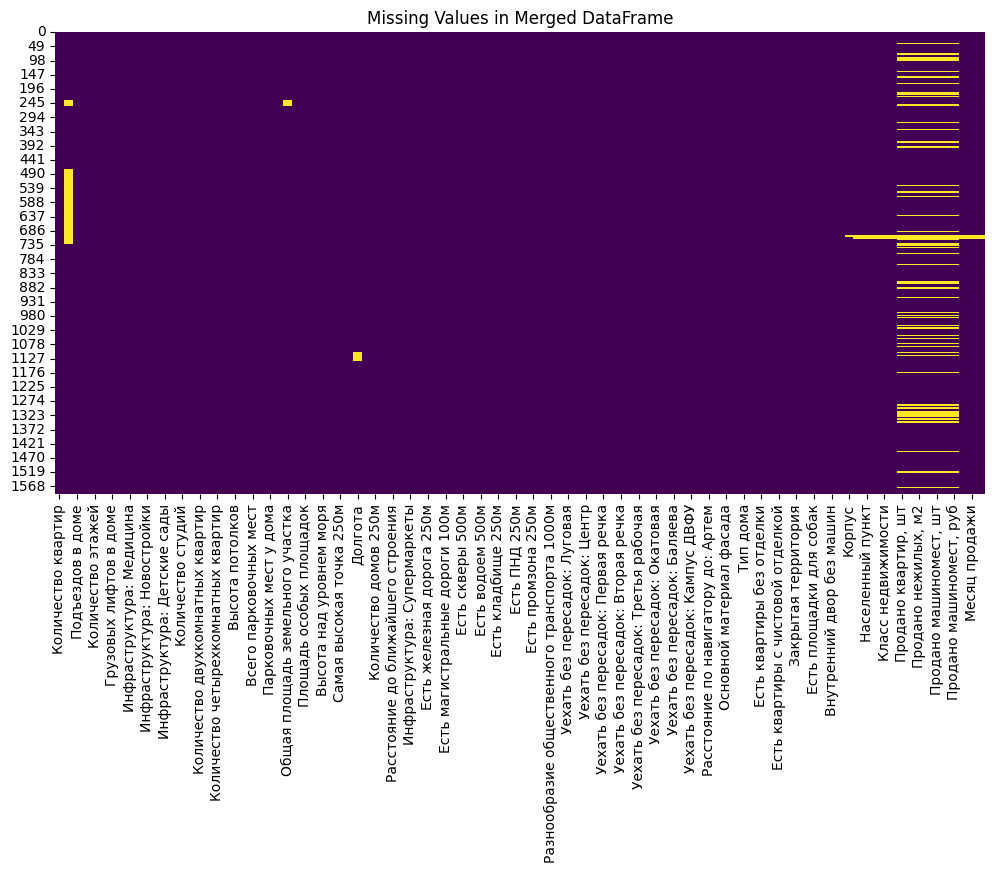

In [17]:
merged_df = pd.merge(df_jk_vladivostok, df_sales_matrix, how='left', left_on=['Проект', 'Корпус'], right_on=['Проект', 'Корпус'])

print("Merged DataFrame:")
print(merged_df.head(5))

plt.figure(figsize=(12, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Merged DataFrame')
plt.show()

In [18]:
merged_df.head(20)

Количество квартир  Общая площадь квартир  Подъездов в доме  \
0                  364                24247.0                 3   
1                  364                24247.0                 3   
2                  364                24247.0                 3   
3                  364                24247.0                 3   
4                  364                24247.0                 3   
5                  364                24247.0                 3   
6                  364                24247.0                 3   
7                  364                24247.0                 3   
8                  364                24247.0                 3   
9                  364                24247.0                 3   
10                 364                24247.0                 3   
11                 364                24247.0                 3   
12                 364                24247.0                 3   
13                 364                24247.0                 3   
14                 364                24247.0                 3   
15                 364                24247.0                 3   
16                 364                24247.0                 3   
17                 364                24247.0                 3   
18                 364                24247.0                 3   
19                 364                24247.0                 3   

    Количество квартир на этаже  Количество этажей  \
0                             7                 23   
1                             7                 23   
2                             7                 23   
3                             7                 23   
4                             7                 23   
5                             7                 23   
6                             7                 23   
7                             7                 23   
8                             7                 23   
9                             7                 23   
10                            7                 23   
11                            7                 23   
12                            7                 23   
13                            7                 23   
14                            7                 23   
15                            7                 23   
16                            7                 23   
17                            7                 23   
18                            7                 23   
19                            7                 23   

    Пассажирских лифтов в доме  Грузовых лифтов в доме  \
0                            6                       3   
1                            6                       3   
2                            6                       3   
3                            6                       3   
4                            6                       3   
5                            6                       3   
6                            6                       3   
7                            6                       3   
8                            6                       3   
9                            6                       3   
10                           6                       3   
11                           6                       3   
12                           6                       3   
13                           6                       3   
14                           6                       3   
15                           6                       3   
16                           6                       3   
17                           6                       3   
18                           6                       3   
19                           6                       3   

    Инфраструктура: Продукты  Инфраструктура: Медицина  Инфраструктура: Спорт  \
0                         50                        11                     50   
1                         50                        11                     50   

In [19]:
unique_counts = df_sales_matrix['Корпус'].nunique()
unique_counts

187

In [20]:
unique_counts = df_sales_matrix['Проект'].nunique()
unique_counts

92

In [21]:
unique_counts = df_jk_vladivostok['Корпус'].nunique()
unique_counts

108

In [22]:
unique_counts = df_jk_vladivostok['Проект'].nunique()
unique_counts

59

C:\Temp\ipykernel_2520\1383103575.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


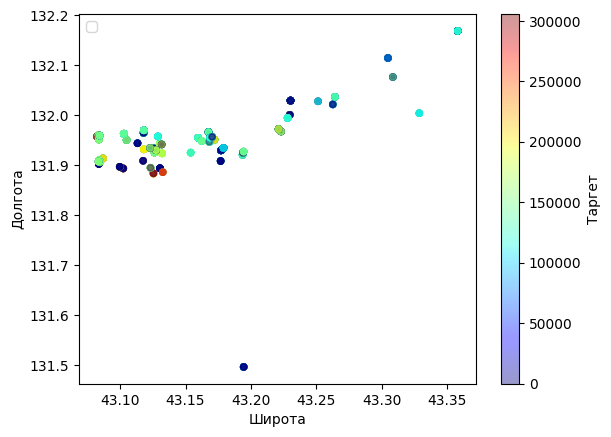

In [23]:
merged_df.plot(kind="scatter", x="Широта", y="Долгота", alpha=0.4,
c="Таргет", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [24]:
print("Basic Info:")
print(merged_df.info())

print("Summary Statistics:")
print(merged_df.describe())

print("First Few Rows:")
print(merged_df.head())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Columns: 106 entries, Количество квартир to Год
dtypes: Int64(26), float64(32), object(48)
memory usage: 1.3+ MB
None
Summary Statistics:
       Количество квартир  Общая площадь квартир  Подъездов в доме  \
count              1595.0            1315.000000            1595.0   
mean           216.581818           10356.350570          1.873354   
std            122.901099            5937.760474          1.539203   
min                  21.0            1219.000000               1.0   
25%                 116.0            6053.500000               1.0   
50%                 220.0           11087.000000               1.0   
75%                 311.0           12635.000000               2.0   
max                 598.0           35741.000000              10.0   

       Количество квартир на этаже  Количество этажей  \
count                       1595.0             1595.0   
mean                     10.351

ValueError: num must be an integer with 1 <= num <= 16, not 17

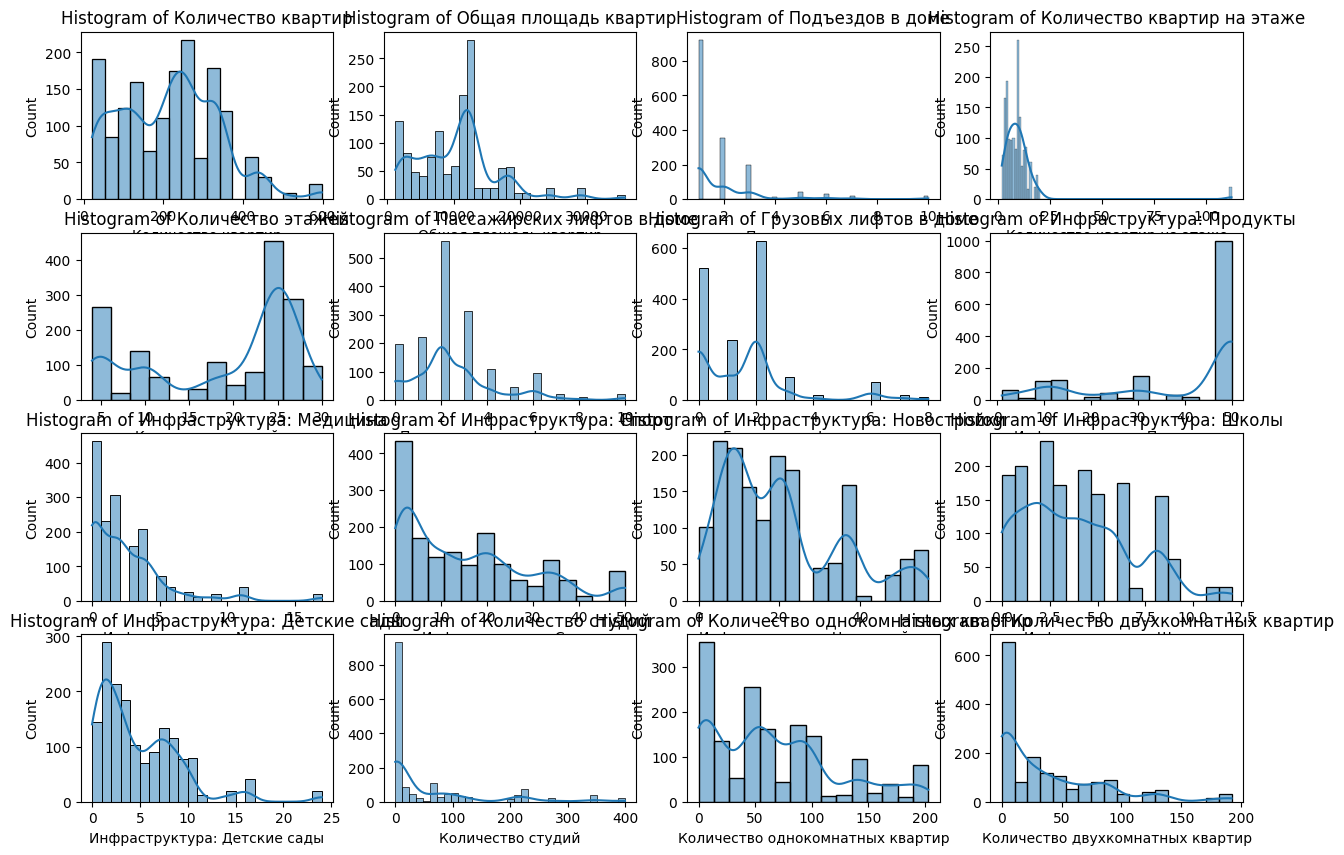

In [25]:
numerical_cols = merged_df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(merged_df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

In [26]:
unique_counts = df_sales_matrix['Продано нежилых, шт'].nunique()
unique_counts

21

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

merged_df.replace(['', ' ', 'nan'], np.nan, inplace=True)

for col in merged_df.columns:
    if merged_df[col].dtype == object:
        merged_df[col] = merged_df[col].str.replace(r'[^\d.]+', '', regex=True)
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

merged_df = merged_df.apply(pd.to_numeric, errors='ignore')

correlation_matrix = merged_df.corr()

correlation_matrix['Таргет'].sort_values(ascending = False).head(20)

C:\Temp\ipykernel_2520\3238378539.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.replace(['', ' ', 'nan'], np.nan, inplace=True)
C:\Temp\ipykernel_2520\3238378539.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  merged_df = merged_df.apply(pd.to_numeric, errors='ignore')


Таргет                                         1.000000
Количество квартир                             0.264023
Продано квартир, шт                            0.262339
Площадь детских площадок                       0.246187
Общая площадь квартир                          0.233279
Количество этажей                              0.226041
Расстояние по навигатору до: Артем             0.213817
Инфраструктура: Продукты                       0.211226
Количество студий                              0.209780
Расстояние по навигатору до: В-надеждинское    0.191101
Инфраструктура: Медицина                       0.191006
Пассажирских лифтов в доме                     0.180931
Год                                            0.172806
Площадь спортивных площадок                    0.160354
Инфраструктура: Школы                          0.144576
Инфраструктура: Детские сады                   0.143341
Инфраструктура: Супермаркеты                   0.140210
Продано машиномест, шт                         0

In [28]:
correlation_matrix['Таргет'].sort_values(ascending = True).head(20)

Расстояние по навигатору до: Кампус ДВФУ      -0.237409
Расстояние по навигатору до: Окатовая         -0.236049
Расстояние по навигатору до: Луговая          -0.222742
Широта                                        -0.220395
Расстояние по навигатору до: Центр            -0.220128
Расстояние по навигатору до: Третья рабочая   -0.218698
Расстояние по навигатору до: Баляева          -0.217014
Расстояние по навигатору до: Первая речка     -0.215109
Расстояние по навигатору до: Вторая речка     -0.142625
Подъездов в доме                              -0.130098
Количество домов 250м                         -0.099326
Долгота                                       -0.096345
Проект                                        -0.089690
Расстояние до ближайшего строения             -0.071446
Количество остальных квартир                  -0.065500
Гостевых мест                                 -0.050108
Корпус                                        -0.022269
Инфраструктура: Торговые центры               -0

In [29]:
corr_target = correlation_matrix['Таргет'].sort_values(ascending=False)
#merged_df = merged_df.drop('Кумулятивная средняя стоимость кв.метра')

significant_corrs = corr_target[(corr_target > 0.2) | (corr_target < -0.2)]
print(significant_corrs)

Таргет                                         1.000000
Количество квартир                             0.264023
Продано квартир, шт                            0.262339
Площадь детских площадок                       0.246187
Общая площадь квартир                          0.233279
Количество этажей                              0.226041
Расстояние по навигатору до: Артем             0.213817
Инфраструктура: Продукты                       0.211226
Количество студий                              0.209780
Расстояние по навигатору до: Первая речка     -0.215109
Расстояние по навигатору до: Баляева          -0.217014
Расстояние по навигатору до: Третья рабочая   -0.218698
Расстояние по навигатору до: Центр            -0.220128
Широта                                        -0.220395
Расстояние по навигатору до: Луговая          -0.222742
Расстояние по навигатору до: Окатовая         -0.236049
Расстояние по навигатору до: Кампус ДВФУ      -0.237409
Name: Таргет, dtype: float64


array([[<Axes: xlabel='Расстояние по навигатору до: Кампус ДВФУ', ylabel='Расстояние по навигатору до: Кампус ДВФУ'>,
        <Axes: xlabel='Таргет', ylabel='Расстояние по навигатору до: Кампус ДВФУ'>,
        <Axes: xlabel='Количество квартир', ylabel='Расстояние по навигатору до: Кампус ДВФУ'>,
        <Axes: xlabel='Продано квартир, шт', ylabel='Расстояние по навигатору до: Кампус ДВФУ'>],
       [<Axes: xlabel='Расстояние по навигатору до: Кампус ДВФУ', ylabel='Таргет'>,
        <Axes: xlabel='Таргет', ylabel='Таргет'>,
        <Axes: xlabel='Количество квартир', ylabel='Таргет'>,
        <Axes: xlabel='Продано квартир, шт', ylabel='Таргет'>],
       [<Axes: xlabel='Расстояние по навигатору до: Кампус ДВФУ', ylabel='Количество квартир'>,
        <Axes: xlabel='Таргет', ylabel='Количество квартир'>,
        <Axes: xlabel='Количество квартир', ylabel='Количество квартир'>,
        <Axes: xlabel='Продано квартир, шт', ylabel='Количество квартир'>],
       [<Axes: xlabel='Расстояние по

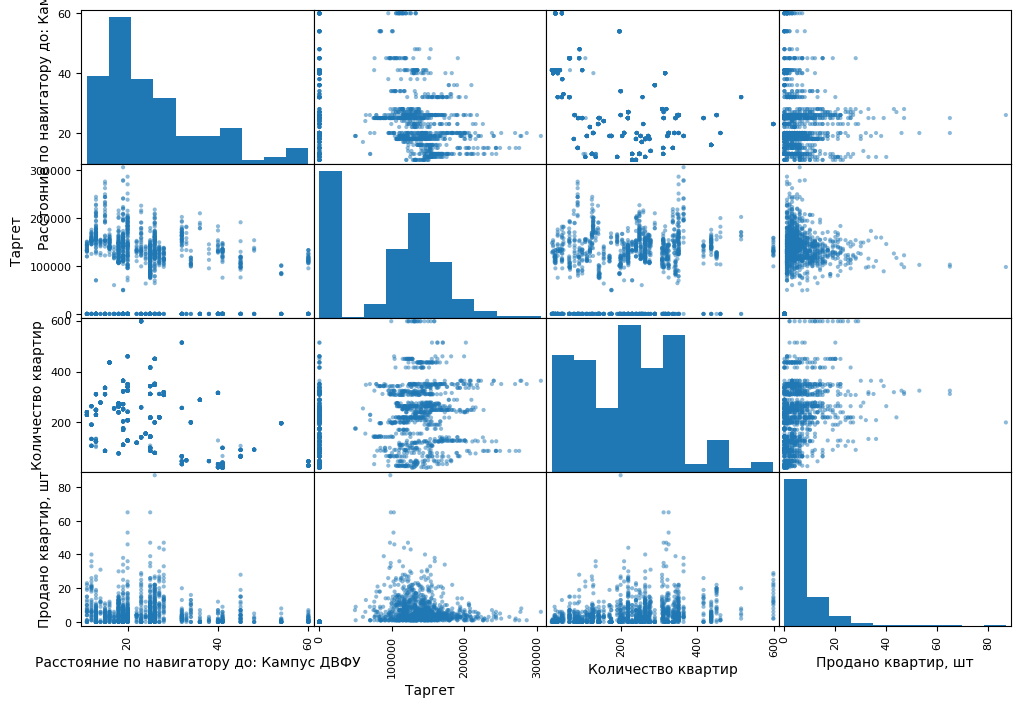

In [30]:
from pandas.plotting import scatter_matrix


attributes = ["Расстояние по навигатору до: Кампус ДВФУ", "Таргет",
              "Количество квартир", "Продано квартир, шт"]
scatter_matrix(merged_df[attributes], figsize=(12, 8))

Масштабируем, Кодируем категориальные признаки

In [31]:
threshold = 10  # Пороговое значение для определения категориальных признаков
categorical_cols = [col for col in merged_df.columns if merged_df[col].nunique() < threshold and col != 'Таргет']
numerical_cols = [col for col in merged_df.columns if col not in categorical_cols and col != 'Таргет']


scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_df[numerical_cols])

scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols)

encoded_df = pd.get_dummies(merged_df[categorical_cols], drop_first=True)

if encoded_df.empty:
    print("Warning: The encoded_df DataFrame is empty. Check your categorical columns and data.")
else:
    final_df = pd.concat([scaled_df, encoded_df], axis=1)
    final_df['Таргет'] = merged_df['Таргет']

    print("Transformed Data:")
    print(final_df.head())

Transformed Data:
   Количество квартир  Общая площадь квартир  Количество квартир на этаже  \
0            1.199862               2.340265                     -0.27519   
1            1.199862               2.340265                     -0.27519   
2            1.199862               2.340265                     -0.27519   
3            1.199862               2.340265                     -0.27519   
4            1.199862               2.340265                     -0.27519   

   Количество этажей  Пассажирских лифтов в доме  Инфраструктура: Продукты  \
0           0.486257                    1.897146                  0.708491   
1           0.486257                    1.897146                  0.708491   
2           0.486257                    1.897146                  0.708491   
3           0.486257                    1.897146                  0.708491   
4           0.486257                    1.897146                  0.708491   

   Инфраструктура: Медицина  Инфраструктура: Спорт

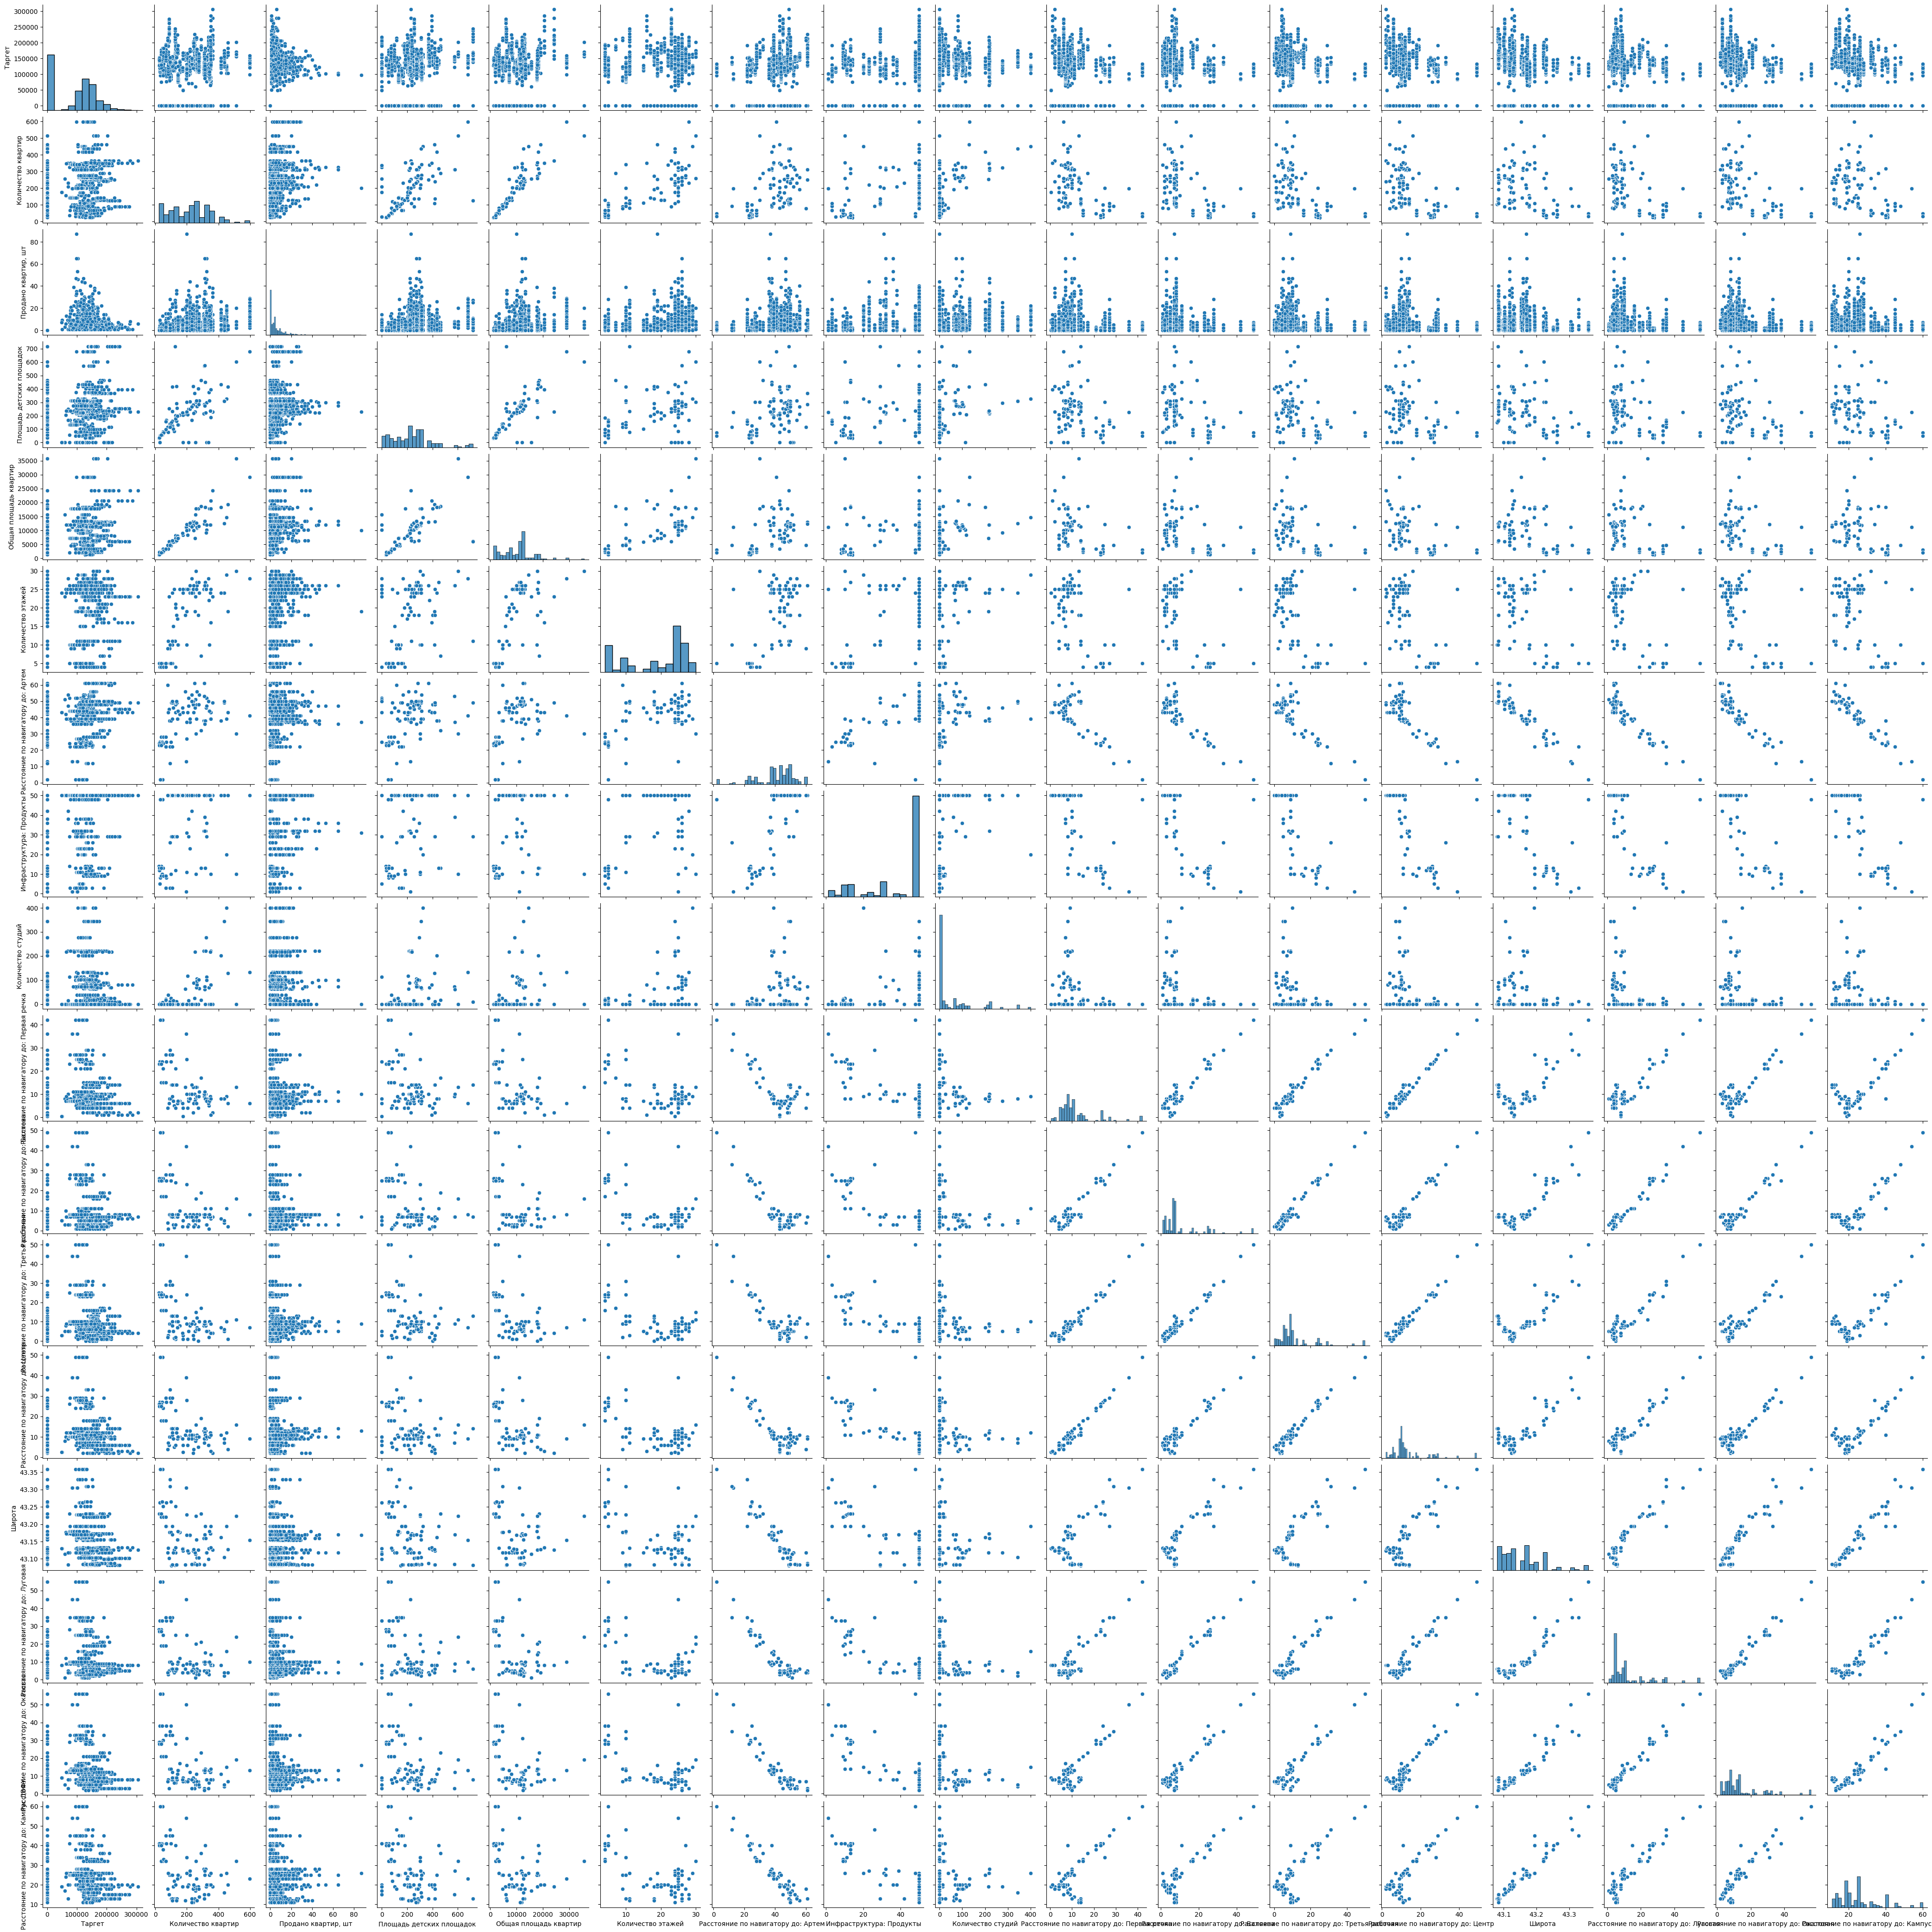

In [32]:
significant_cols = significant_corrs.index

sns.pairplot(merged_df[significant_cols])
plt.show()

Проводим стандартизацию признаков, чтобы они имели среднее значение 0 и стандартное отклонение 1. Проводим кластеризацию методом к средних чтобы минимизировать внутрикластерное рассеяние, то есть суммарное расстояние между точками данных и центроидами кластеров, добавляем результаты в исходный датасет и визуализируем на выводы на карте

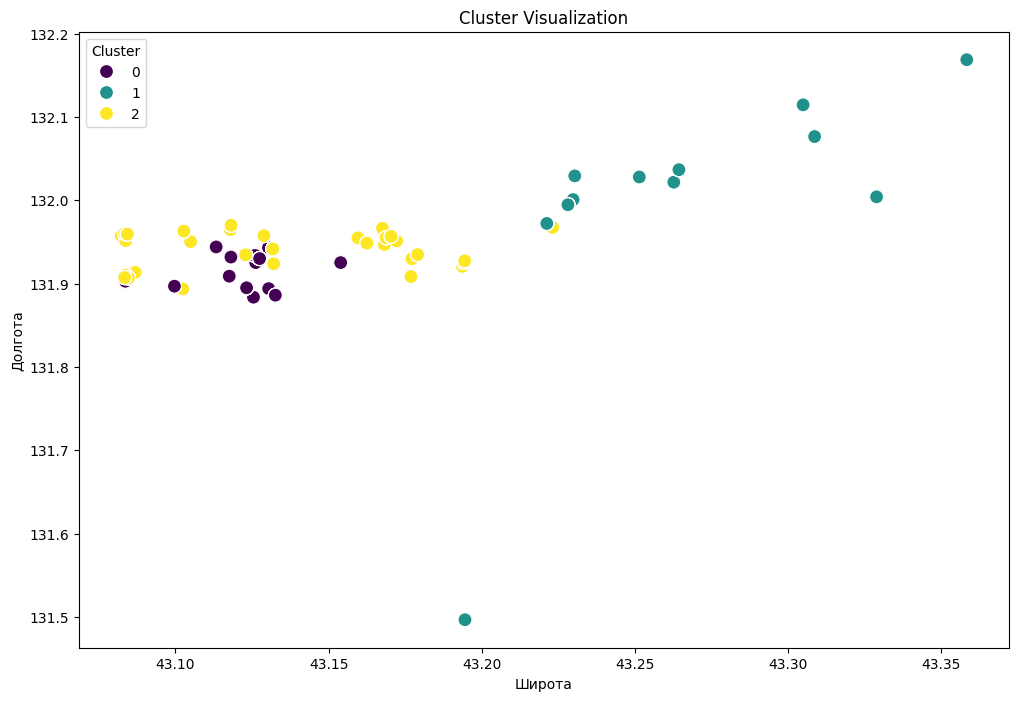

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = merged_df.select_dtypes(include=[np.number]).drop(columns=['Таргет']).fillna(0)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

merged_df['Cluster'] = clusters

plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='Широта', y='Долгота', hue='Cluster', palette='viridis', s=100)
plt.title('Cluster Visualization')
plt.show()

Root Mean Squared Error: 13980.42427553727


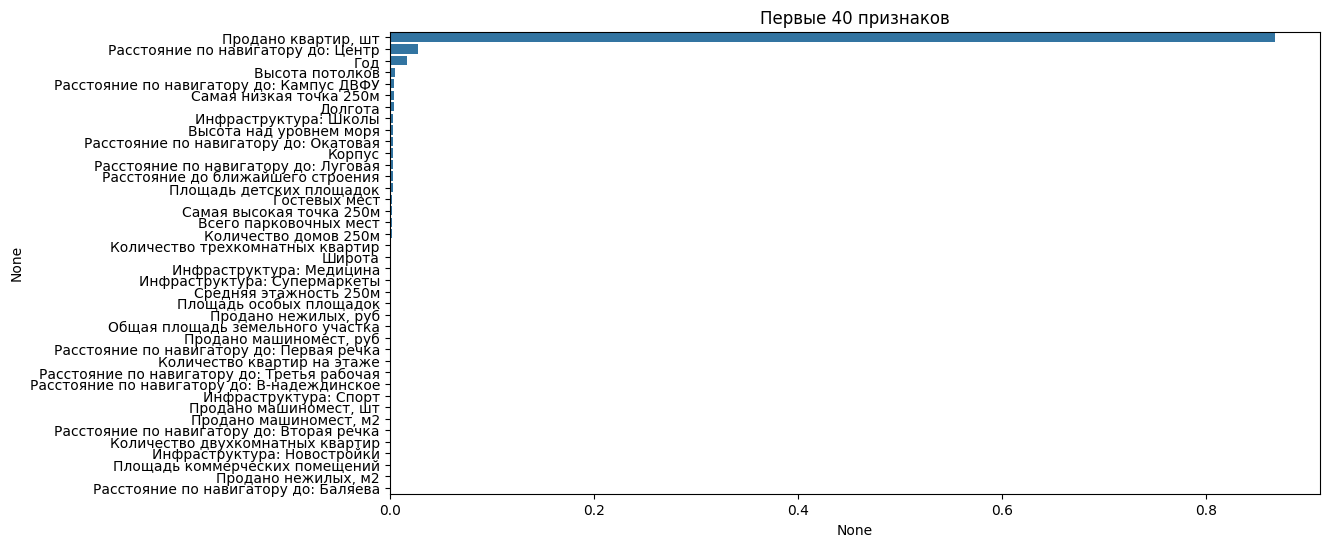

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

merged_df = merged_df.dropna(subset=['Таргет'])

X = merged_df.drop(columns=['Таргет', 'Cluster']).select_dtypes(include=[np.number]).fillna(0)
y = merged_df['Таргет']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

top_features = feature_importances[:40]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title('Первые 40 признаков')
plt.show()

In [35]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f'Root Mean Squared Error (Ridge Regression): {rmse_ridge}')

Root Mean Squared Error (Ridge Regression): 60131.475881504644


C:\Users\Сергей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.59259e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


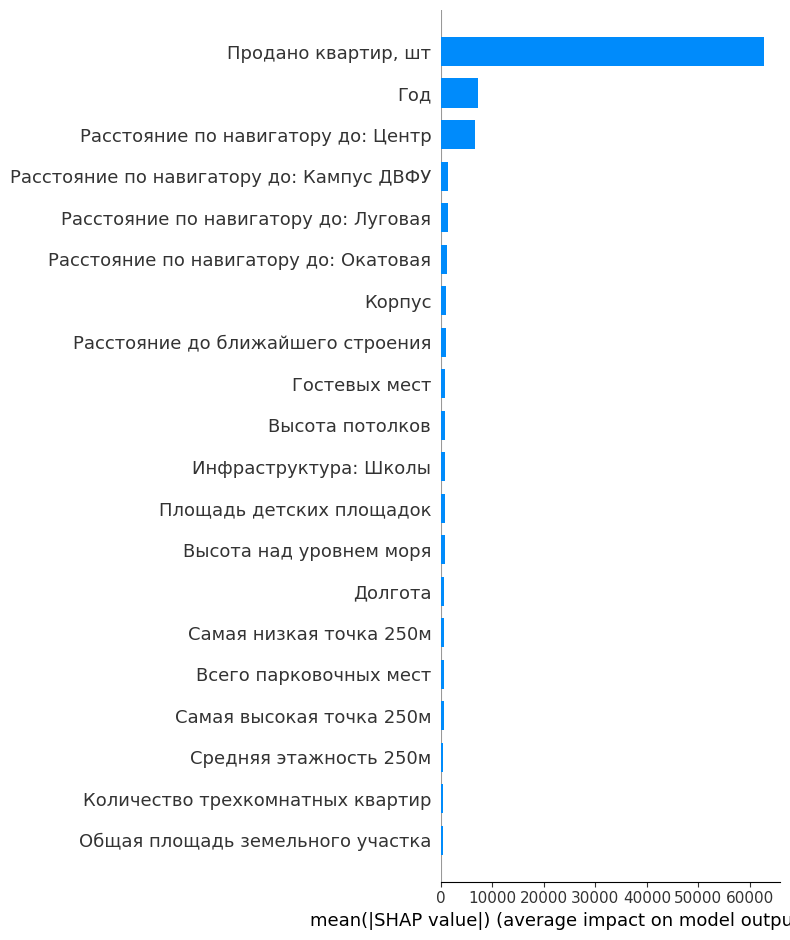

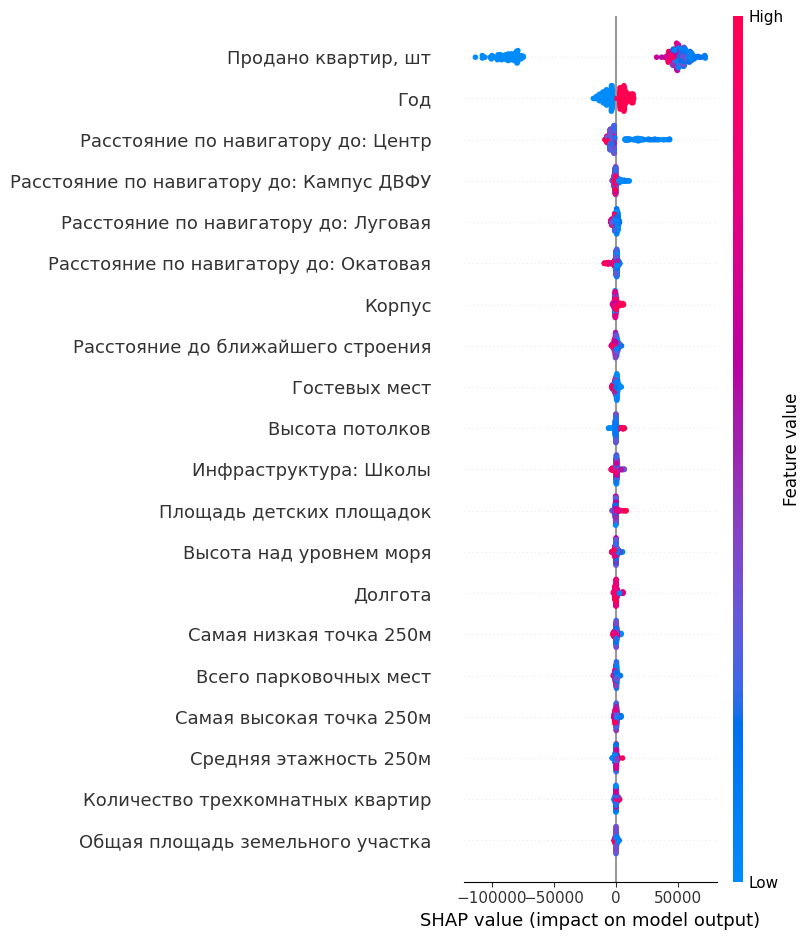

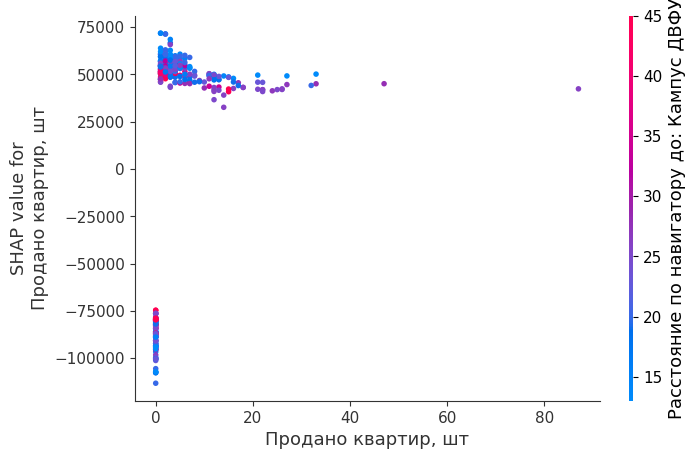

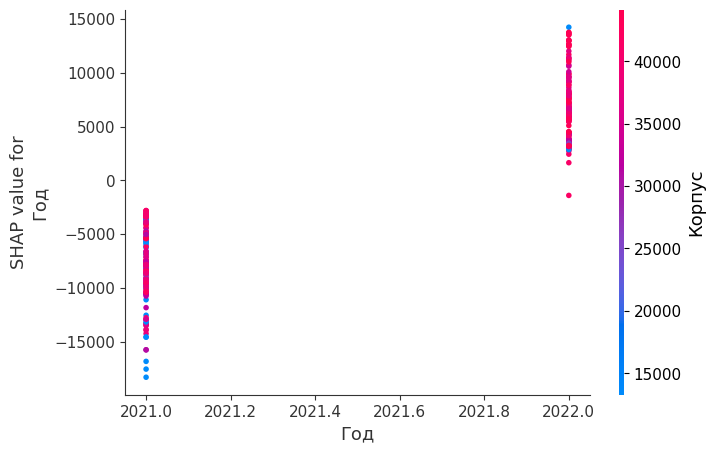

In [42]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

shap.summary_plot(shap_values, X_test)

shap.dependence_plot("Продано квартир, шт", shap_values, X_test)
shap.dependence_plot("Год", shap_values, X_test)

shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])